In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
# !pip install missingno
import missingno as msn
from sklearn.linear_model import LinearRegression

In [2]:
dataOriginal = pd.read_csv('../Dataset/healthcare-dataset-stroke-data.csv')
dataOriginal.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Indicator(
                mode = "number",
                value = dataOriginal.shape[0],
                number={'font':{'color': '#7b68ee', 'size':100}},
                delta = {"reference": 600},
                title = {"text": "Rows 🗒 <br><span style="
                                 "'font-size:0.7em;color:gray'>in the data</span>"},
                domain = {'y': [0.7, 1], 'x': [0, 0.5]}))

fig.add_trace(go.Indicator(
                mode = "number",
                value = dataOriginal.shape[1],
                number={'font':{'color': '#7b68ee', 'size':100}},
                delta = {"reference": 600, "valueformat": ".0f"},
                title = {"text": "Columns 🏛 <br><span style="
                                 "'font-size:0.7em;color:gray'>in the data</span>"},
                domain = {'y': [0, 0.3], 'x': [0.5, 1]}))
fig.show()

In [4]:
dataOriginal.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


Text(0.5, 1.15, 'Missing values')

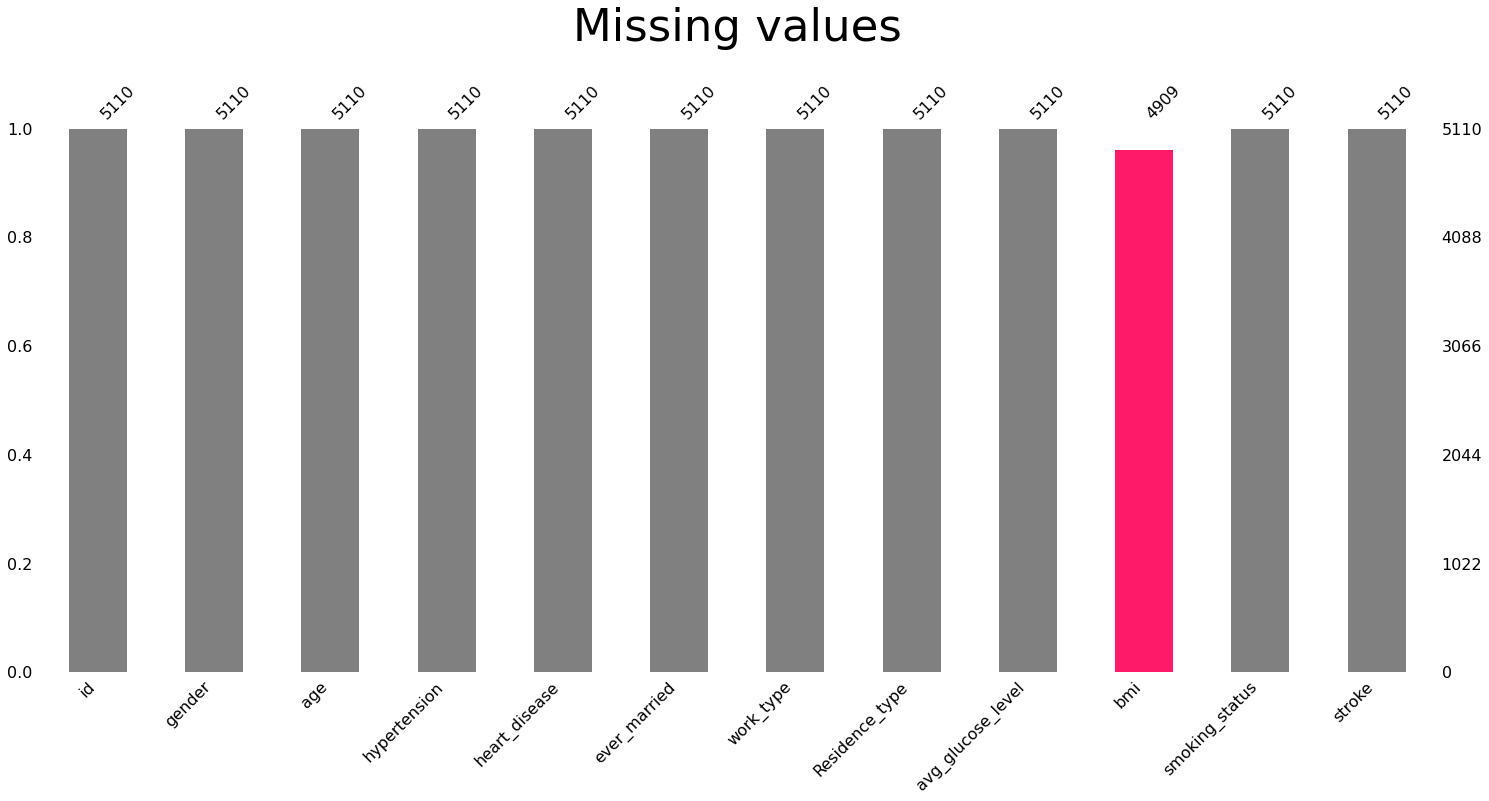

In [5]:
mis_val_colors = []

for col in dataOriginal.columns:
    if dataOriginal[col].isna().sum() != 0:
        mis_val_colors.append('#fe1969')
    else:
        mis_val_colors.append('gray')

msn.bar(dataOriginal, color=mis_val_colors)
plt.title('Missing values', size=45, y=1.15)

Όπως Μπορεί κανείς να δει απο το παραπάνω bar plot ο δείκτης BMI περιέχει κάποιες κενές τιμές ή missing values.
Ας αντικαταστήσουμε τις χαμένες τιμές με τον αριθμιτικό μέσο του δείκτη αυτού. Σαν δεύτερο πείραμα θα αντικαταστήσουμε αυτές τις NaN values με την βοηθεία μιας Linear Regression, με features με το μεγαλύτερο correlation value απο τον correlation matrix.

In [ ]:


lr = LinearRegression()
datanew = dataOriginal[['age', 'ever_married', 'smoking_status','avg_glucose_level','bmi']].copy()

traindf = datanew[datanew['bmi'].isnull()==False]
testdf = datanew[datanew['bmi'].isnull()==True]
y = traindf['bmi']
traindf.drop("bmi",axis=1,inplace=True)
cat_columns = [cname for cname in traindf.columns
                            if traindf[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    traindf[col] = encoder.fit_transform(traindf[col])

cat_columns = [cname for cname in testdf.columns
                            if testdf[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    testdf[col] = encoder.fit_transform(testdf[col])    
lr.fit(traindf,y)
testdf.drop("bmi",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['bmi']= pred


## Fill NaN values with mean value of the bmi

Text(0.5, 1.15, 'Missing values')

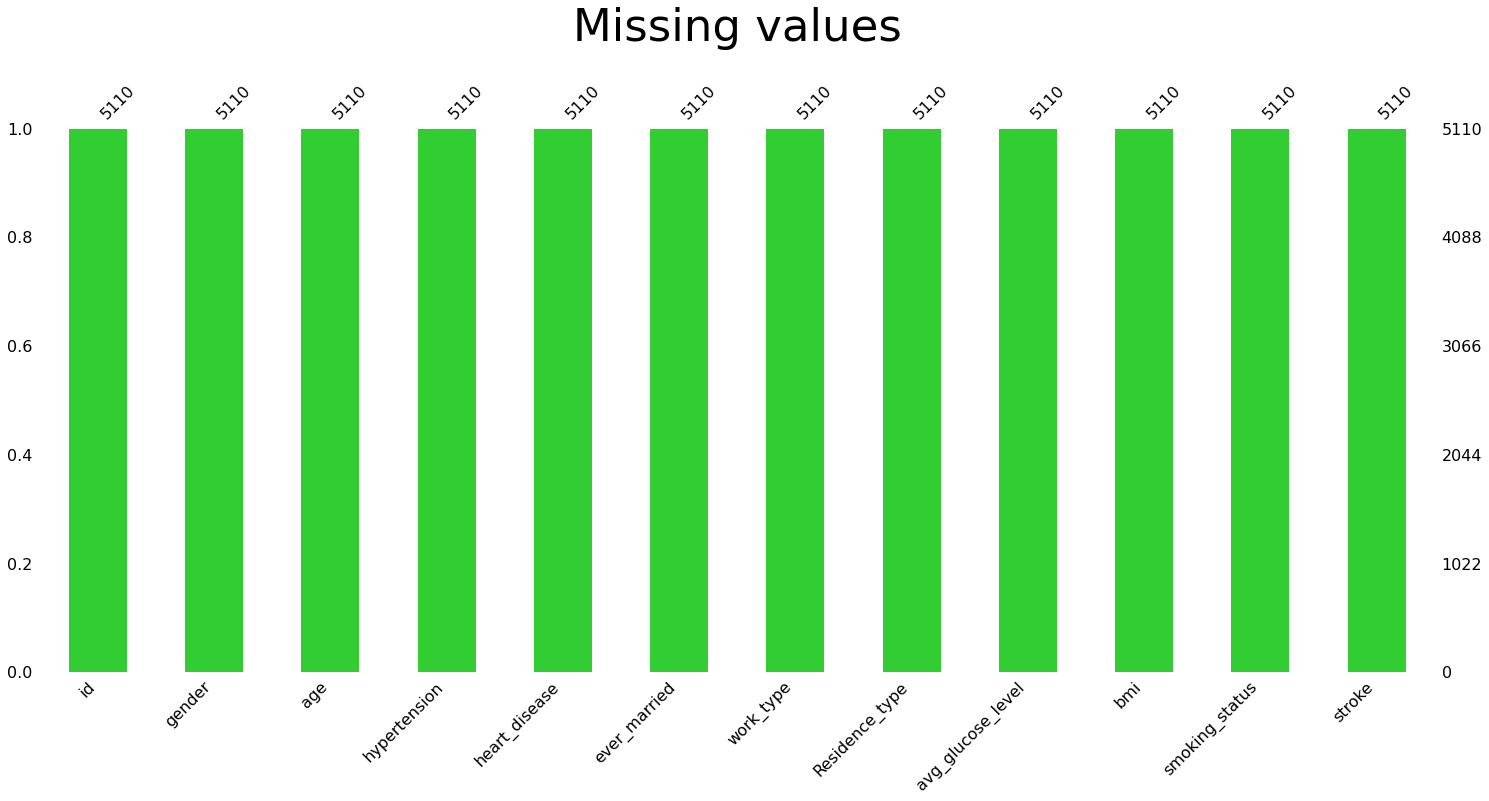

In [6]:
def FillWithMean(dataOriginal):
    data = dataOriginal


    data['bmi'] = data['bmi'].fillna(np.round(data.bmi.mean(), 2))
    mis_val_colors_after = []

    for col in data.columns:
        if data[col].isna().sum() != 0:
            mis_val_colors_after.append('#fe1969')
        else:
            mis_val_colors_after.append('limegreen')

    msn.bar(data, color=mis_val_colors_after)
    plt.title('Missing values', size=45, y=1.15)
    return data

In [ ]:
data = FillWithMean(dataOriginal)

## Fill NaN values with Multivariate Linear Regression

In [ ]:
def FillWithLR(dataOriginal):
    data = dataOriginal
    # data[data['bmi'].isnull==True] = testdf['bmi']
    data['bmi'] = data['bmi'].fillna(testdf['bmi'])
    print(data.head(10))
    # data['bmi'] = data['bmi'].fillna(np.round(data.bmi.mean(), 2))
    mis_val_colors_after = []

    for col in data.columns:
        if data[col].isna().sum() != 0:
            mis_val_colors_after.append('#fe1969')
        else:
            mis_val_colors_after.append('limegreen')

    msn.bar(data, color=mis_val_colors_after)
    plt.title('Missing values', size=45, y=1.15)
    return data

In [ ]:
data = FillWithLR(dataOriginal)

In [ ]:
pie_colors = ('#140E36', '#091AAB')

pred_classes = data.stroke.value_counts()
print(pred_classes)

plt.figure(figsize=(17, 12))
patches, texts, pcts = plt.pie(pred_classes,
                               labels=['no', 'yes'],
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 20,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Patient had a stroke', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
data.drop(['id'], axis=1, inplace=True)

In [ ]:
data = data[data.gender != 'Other']
plt.figure(figsize=(12, 8))
gender_plot = sns.countplot(y=data.gender, palette=['#dd38ff', '#5727ed'])
gender_plot.set_title('Genders', fontsize=35, y=1.05, **hfont)
gender_plot.set(ylabel=None)
plt.grid(False)
gender_plot.set_yticklabels(gender_plot.get_yticklabels(), size=25, **hfont)

In [ ]:
gender_plot = sns.catplot(x='gender', y='stroke', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=['#dd38ff', '#5727ed'])
gender_plot.set_xticklabels(['Male', 'Female'], size=30, **hfont)
gender_plot.fig.suptitle('Gender Influence on Stroke',
                            size=45, y=1.05, **hfont)
gender_plot.set(xlabel=None, ylabel=None)

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.title('Stroke distribution by Age', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(-5, 0.03, 'Stroke', {'font': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': '#dd38ff'}, alpha=0.9)

ax.text(8, 0.03, '|', {'font': 'Serif',
                       'size': '20',
                       'weight': 'bold',
                       'color': 'black'}, alpha=0.9)

ax.text(11, 0.03, 'Healthy', {'font': 'Serif',
                              'size': '20',
                              'weight': 'bold',
                              'color': '#5727ed'}, alpha=0.9)

sns.kdeplot(data=data[data.stroke == 1],
            x='age', shade=True, ax=ax, color='#dd38ff', alpha=1)
sns.kdeplot(data=data[data.stroke == 0],
            x='age', shade=True, ax=ax, color='#5727ed', alpha=0.7)
plt.xlabel('Age', **hfont)

Απο την παραπάνω κατανομή, μπορεί κανείς να καταλάβει οτι μεγαλύτερη πιθανότητα Εγκεφαλικού έχουν οι ηλικιακές ομάδες μεταξύ 70 και 80 χρονών.

In [ ]:
def age_plot(data, col_name):

    age_data = data[[col_name, 'stroke']]
    age_data[col_name] = pd.cut(age_data[col_name],
                               bins=[0, 20, 40, 60, 80, 100],
                               labels=['0-20',
                                       '20-40',
                                       '40-60',
                                       '60-80',
                                       '80-100'])

    color = np.random.choice(['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE'], 1)[0]
    plt.figure(figsize=(15, 5))
    plot = sns.pointplot(x=col_name, y='stroke',
                  dodge=0.1, capsize=.1, data=age_data, color=color)
    plot.set_title(f'{col_name} influence per age group', fontsize=25, **hfont)
    plot.set(xlabel=None, ylabel=None)


age_plot(data, 'age')

Από το παραπάνω plot μπορεί κανείς να παρατηρήσει οτι όσο πιο μεγάλο ηλικιακά είναι ένα άτομο, τόσο πιο πιθανό είναι να πάθει εγκεφαλικό. Η ηλικία δηλαδή παίζει αρκετά μεγάλο ρόλο.

In [ ]:
plt.figure(figsize=(12, 8))
hypertension_plot = sns.countplot(x=data.hypertension,
                            palette=['#dd38ff', '#5727ed'])
hypertension_plot.set_title('Count for Hypertension classes',
                      fontsize=35, y=1.05, **hfont)
hypertension_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
hypertension_plot.set_xticklabels(['No', 'Yes'], size=25, **hfont)

In [ ]:
def hypertension_plot(data, col_name):

    hypertension_data = data[[col_name, 'stroke']]

    color = np.random.choice(['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE'], 1)[0]
    plt.figure(figsize=(15, 7))
    hypertension = sns.pointplot(x=col_name, y='stroke',
                           dodge=0.1, capsize=.1,
                           data=hypertension_data,
                           color=color)
    hypertension.set_title('Hypertension influence',
                            fontsize=35, **hfont)
    hypertension.set(xlabel=None, ylabel=None)
    hypertension.set_xticklabels(['No', 'Yes'], size=20, **hfont)


hypertension_plot(data, 'hypertension')

In [ ]:
heart_dis_data = data.heart_disease.value_counts()

explode = (0.07, 0.1)
pie_colors = ('#5735FD', '#3C78E8')

plt.figure(figsize=(15, 10))
patches, texts, pcts = plt.pie(heart_dis_data,
                               labels=['No', 'Yes'],
                               explode=explode,
                               colors=pie_colors,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 18,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')
plt.title('Heart Disease', size=45, **hfont)

In [ ]:
heart_dis_plot = sns.catplot(x='heart_disease', y='stroke', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=['#dd38ff', '#5727ed'])
heart_dis_plot.set_xticklabels(['No', 'Yes'], size=30, **hfont)
heart_dis_plot.fig.suptitle('Heart Disease Influence on Stroke',
                            size=45, y=1.05, **hfont)
heart_dis_plot.set(xlabel=None, ylabel=None)

Είναι λογικό κάποια καρδιακή ασθένεια να επιρεάζει και την πιθανότητα εγκεφαλικου. Είναι κάτι το οποίο επιβεβαιώνεται και απο το παραπάνω plot. 

In [ ]:
married_data = data.ever_married.value_counts()

explode = (0.07, 0.02)
pie_colors = ('#5735FD', '#3C78E8')

plt.figure(figsize=(15, 10))
patches, texts, pcts = plt.pie(married_data,
                               labels=married_data.index,
                               explode=explode,
                               colors=pie_colors,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 25,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')
plt.title('Married (y/n)', size=45, **hfont)

In [ ]:
def married_plot(data, col_name):

    married_data = data[[col_name, 'stroke']]

    color = np.random.choice(['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE'], 1)[0]
    plt.figure(figsize=(15, 7))
    married = sns.pointplot(x=col_name, y='stroke',
                            dodge=0.1, capsize=.1,
                            data=married_data,
                            color=color)
    married.set_title('Married influence', fontsize=35, **hfont)
    married.set(xlabel=None, ylabel=None)
    married.set_xticklabels(['No', 'Yes'], size=20, **hfont)


married_plot(data, 'ever_married')

In [ ]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
work_type_plot = sns.countplot(x=data.work_type, ax=ax1, palette=['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE'])
work_type_plot.set_title('Work type count plot &'
                         ' influence on stroke',
                         fontsize=35, y=1.05, **hfont)
work_type_plot.set(xlabel=None,
                   ylabel=None)
work_type_plot.set_xticklabels(work_type_plot.get_xticklabels(),
                                size=18, **hfont)


ax2 = fig.add_subplot(grid[1, :])
work_type_cat = sns.pointplot(x=data.work_type, y='stroke', data=data,
             ax=ax2, palette=['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE'])
work_type_cat.set(xlabel=None,
                   ylabel=None)
work_type_cat.set_xticklabels([])

Θα μπορούσε κανείς να συμπαιράνει οτι τα παιδιά και αυτοί που δεν έχουν ποτέ δουλέψει το risk για stroke προσεγγίζει το μηδέν. 

In [ ]:
residence_data = data.Residence_type.value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(17, 12))
patches, texts, pcts = plt.pie(residence_data,
                               labels=residence_data.index,
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif'})
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Residence Type', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [ ]:
residence_plot = sns.catplot(x='Residence_type', y='stroke', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=['#dd38ff', '#5727ed'])
residence_plot.set_xticklabels(['Urban', 'Rural'],
                               size=30, **hfont)
residence_plot.fig.suptitle('Residence Type Influence on Stroke',
                            size=45, y=1.05, **hfont)
residence_plot.set(xlabel=None, ylabel=None)

Κάποιος που ζεί σε μια πόλη φαίνεται να έχει περισσότερες πιθανότητες για stroke. Μπορεί λόγω άγχους.

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.title('Stroke distribution by glucose lvl', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(200, 0.01, 'Stroke', {'font': 'Serif',
                              'size': '20',
                              'weight': 'bold',
                              'color': '#dd38ff'}, alpha=0.9)

ax.text(240, 0.01, '|', {'font': 'Serif',
                         'size': '20',
                         'weight': 'bold',
                         'color': 'black'}, alpha=0.9)

ax.text(247, 0.01, 'Healthy', {'font': 'Serif',
                               'size': '20',
                               'weight': 'bold',
                               'color': '#5727ed'}, alpha=0.9)

sns.kdeplot(data=data[data.stroke == 1],
            x='avg_glucose_level', shade=True, ax=ax, color='#dd38ff',
            alpha=1)
sns.kdeplot(data=data[data.stroke == 0],
            x='avg_glucose_level', shade=True, ax=ax, color='#5727ed',
            alpha=0.7)
plt.xlabel('AVG glucose lvl', **hfont)

In [ ]:
def avg_glucose_plot(data, col_name):

    avg_glucose_data = data[[col_name, 'stroke']]
    avg_glucose_data[col_name] = pd.cut(avg_glucose_data[col_name],
                               bins=[50, 100, 150, 200, 250, 300],
                               labels=['50-100',
                                       '100-150',
                                       '150-200',
                                       '200-250',
                                       '250-300'])

    color = np.random.choice(['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE'], 1)[0]
    plt.figure(figsize=(15, 5))
    plot = sns.pointplot(x=col_name, y='stroke',
                  dodge=0.1, capsize=.1, data=avg_glucose_data, color=color)
    plot.set_title(f'AVG glucose Lvl influence', fontsize=25, **hfont)
    plot.set(xlabel=None, ylabel=None)


avg_glucose_plot(data, 'avg_glucose_level')

Το παραπάνω Plot μας δείχνει οτι όσο πιο υψηλή είναι η τιμή της γλυκόζης στο αίμα, τόσο πιο μεγάλη η πιθανότητα εγκεφαλικου.

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.title('Stroke distribution by BMI', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(40, 0.06, 'Stroke', {'font': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': '#dd38ff'}, alpha=0.9)

ax.text(47, 0.06, '|', {'font': 'Serif',
                        'size': '20',
                        'weight': 'bold',
                        'color': 'black'}, alpha=0.9)

ax.text(48.5, 0.06, 'Healthy', {'font': 'Serif',
                                'size': '20',
                                'weight': 'bold',
                                'color': '#5727ed'}, alpha=0.9)

sns.kdeplot(data=data[(data.stroke == 1) & (data.bmi < 60)],
            x='bmi', shade=True, ax=ax, color='#dd38ff',
            alpha=1)
sns.kdeplot(data=data[(data.stroke == 0) & (data.bmi < 60)],
            x='bmi', shade=True, ax=ax, color='#5727ed',
            alpha=0.7)
plt.xlabel('BMI', **hfont)

In [ ]:
def bmi_plot(data, col_name):

    bmi_data = data[[col_name, 'stroke']]
    bmi_data[col_name] = pd.cut(bmi_data[col_name],
                               bins=[10, 20, 30, 40, 50, 60, 70],
                               labels=['10-20',
                                       '20-30',
                                       '30-40',
                                       '40-50',
                                       '50-60',
                                       '60-70'])

    color = np.random.choice(['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE'], 1)[0]
    plt.figure(figsize=(15, 5))
    plot = sns.pointplot(x=col_name, y='stroke',
                  dodge=0.1, capsize=.1, data=bmi_data, color=color)
    plot.set_title(f'BMI influence', fontsize=25, **hfont)
    plot.set(xlabel=None, ylabel=None)


bmi_plot(data, 'bmi')

In [ ]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
smoke_plot = sns.countplot(x=data.smoking_status, ax=ax1, palette=['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE'])
smoke_plot.set_title('Smoking status count plot &'
                         ' influence on stroke',
                         fontsize=35, y=1.05, **hfont)
smoke_plot.set(xlabel=None,
                   ylabel=None)
smoke_plot.set_xticklabels(smoke_plot.get_xticklabels(),
                                size=18, **hfont)


ax2 = fig.add_subplot(grid[1, :])
smoke_cat = sns.pointplot(x=data.smoking_status, y='stroke', data=data,
             ax=ax2, palette=['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE'])
smoke_cat.set(xlabel=None,
                   ylabel=None)
smoke_cat.set_xticklabels([])

In [7]:
data['gender']=data['gender'].apply(lambda x: 1 if x=='Male' else 0)
data['ever_married']=data['ever_married'].apply(lambda x: 1 if x=='Yes' else 0)
data['Residence_type']=data['Residence_type'].apply(lambda x: 1 if x=='Urban' else 0)


def func1(x):
    if x=='Private':
        return 0
    elif x=='Self-employed':
        return 1
    elif x=='Govt-job':
        return 2
    elif x=='children':
        return 3
    else:
        return 4

def func2(x):
    if x=='formerly smoked':
        return 0
    elif x=='never smoked':
        return 1
    elif x=='smokes':
        return 2
    else:
        return 3

data['work_type']=data['work_type'].apply(func1)

data['smoking_status']=data['smoking_status'].apply(func2)


In [8]:
cat_columns = [cname for cname in data.columns
                        if data[cname].dtype == 'object']

# encoder = preprocessing.LabelEncoder()

# for col in cat_columns:
#     data[col] = encoder.fit_transform(data[col])


strokeDF = data[data['stroke']==1]
nostrokeDF = data[data['stroke']==0]
valuesStroke= strokeDF.drop(['stroke'], axis=1).values.flatten().tolist()
valuesNoStroke=nostrokeDF.drop(['stroke'], axis=1).values.flatten().tolist()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=valuesStroke,
      theta=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'],
      fill='toself',
      name='Stroke'
))
fig.add_trace(go.Scatterpolar(
      r=valuesNoStroke,
      theta=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'],
      fill='toself',
      name='No-Stroke'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 2]
    )),
  showlegend=True
)

fig.show()

In [ ]:
# cat_columns = [cname for cname in data.columns
#                         if data[cname].dtype == 'object']

# encoder = preprocessing.LabelEncoder()

# for col in cat_columns:
#     data[col] = encoder.fit_transform(data[col])

print(data.head(20))

<AxesSubplot:>

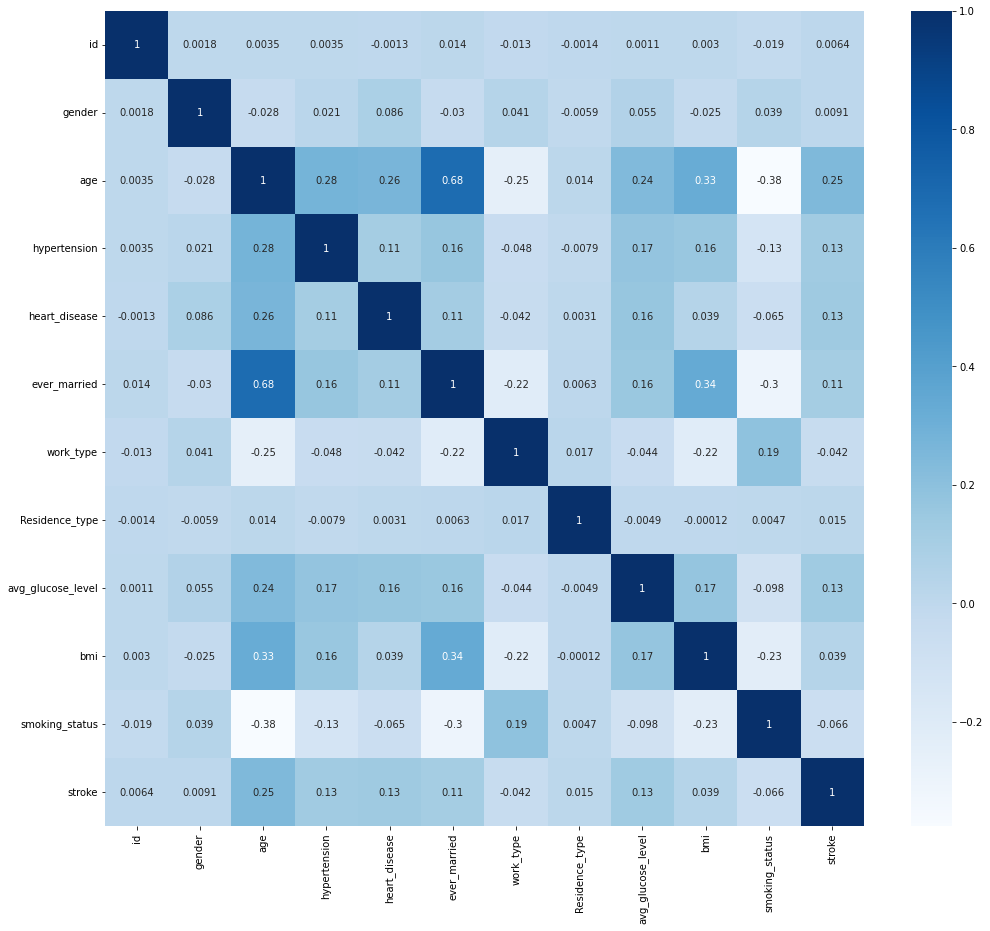

In [9]:
plt.figure(figsize=(17, 15))

corr_mask = np.triu(data.corr())
h_map = sns.heatmap(data.corr(),  annot= True, cmap='Blues')
h_map

Απο τον παραπάνω correlation matrix μπορεί κανείς να δει οτι τα features που έχουν την μεγαλύτερη συσχέτηση είναι:
 1. age
 2. ever_married
 3. smoking_status
 4. avg_glucose_level
 5. bmi
 6. hypertension
 7. Heart_disease

In [ ]:
# print(data.head(10))
# std=StandardScaler()
# columns = ['avg_glucose_level','bmi','age']
# scaled = std.fit_transform(data[['avg_glucose_level','bmi','age']])
# scaled = pd.DataFrame(scaled,columns=columns)
# data=data.drop(columns=columns,axis=1)
# data=data.merge(scaled, left_index=True, right_index=True, how = "left")
# print(data.head(10))


In [10]:
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score
from sklearn.feature_selection import SelectKBest,chi2
from sklearn import naive_bayes, svm,metrics
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
# !pip install imblearn
from imblearn.over_sampling import SMOTE
Xorig = data.drop(['stroke'], axis=1)
yorig = data.stroke
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(Xorig, yorig)
print("Total: ", X.shape)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42,stratify=y_train)

print("train: ",X_train.shape)
print("val: ",X_val.shape)
print("test: ",X_test.shape)

Total:  (9722, 11)
train:  (6999, 11)
val:  (778, 11)
test:  (1945, 11)


## Training approach with chi2 test for feature selection

In [11]:
X_names = Xorig.columns.values
print(X_names)
p_value_limit = 0.98
#this feature selection is ranking features with respect to their usefulness and is not used to make statements about statistical dependence or independence of variables.
features = pd.DataFrame()
for cat in np.unique(y_train):
    chi2test, p = feature_selection.chi2(X_train,y_train==cat)#chi2(tfidf,data["Sentiment"]==cat)
    features = features.append(pd.DataFrame({"feature":X_names,"score":1-p,"Y":cat}))
    features = features.sort_values(["Y","score"],ascending=[True,False])

    features = features[features['score']>p_value_limit]

X_scores = features["score"].unique().tolist()
X_names = features["feature"].unique().tolist()

# praktika h Chi^2 einai
# alpha = 1.0 - prob
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (fail to reject H0)')

for cat in np.unique(data["stroke"]):
    print("# {}:".format(cat))
    print(" . selected features:", len(features[features["Y"]==cat]))
    print(" . top features:",",".join(features[features["Y"]==cat]["feature"].values[:20]))
    # print(" . top features scores:",",".join(str(features[features["Y"]==cat]["score"].values[:10])))
    print(" ")

StatisticalTest = SelectKBest(score_func=chi2, k=5)
fit = StatisticalTest.fit(X_train, y_train)
X_new=StatisticalTest.fit_transform(X_train, y_train)
X_val=StatisticalTest.fit_transform(X_val, y_val)
# print(X_new)

['id' 'gender' 'age' 'hypertension' 'heart_disease' 'ever_married'
 'work_type' 'Residence_type' 'avg_glucose_level' 'bmi' 'smoking_status']
# 0:
 . selected features: 9
 . top features: id,gender,age,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,ever_married
 
# 1:
 . selected features: 9
 . top features: id,gender,age,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,ever_married
 


## With mean value of BMI

In [ ]:
list_alpha = np.arange(1/100000, 10, 0.1)
param_grid = {'alpha':list_alpha
               }
grid = GridSearchCV(naive_bayes.ComplementNB(), param_grid, refit = True, verbose = 0)
#ComplementNB()

grid.fit(X_new, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
#
# # print classification report
print(metrics.classification_report(y_test, grid_predictions))


param_grid = {'C':[0.001, 0.01, 0.1, 1.0,1.1,1.2,10,100,1000],
              'max_iter': [200,500,1000],
              'solver':['newton-cg','lbfgs']
              }
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 0)


grid.fit(X_new, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

param_grid = {'n_estimators':[10,50,100,200,300,500],
              'learning_rate': [0.001,0.01,0.1,1,10],
              'max_depth':[10,20,50,70,100]
              }
grid = GridSearchCV(GradientBoostingClassifier(loss = 'exponential'), param_grid, refit = True, verbose = 0)


grid.fit(X_new, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

param_grid = {'n_estimators':[10,50,100,200,300,500]
              
              }
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 0)


grid.fit(X_new, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

param_grid = {'C':[0.01,0.1,1,1.2,1.5,10,100,1000,2000],
              'kernel':['rbf','linear'],
              'gamma':['scale','auto']

              }
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 0)


grid.fit(X_new, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

GBC
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       393
           1       0.96      0.97      0.97       385

    accuracy                           0.97       778
   macro avg       0.97      0.97      0.97       778
weighted avg       0.97      0.97      0.97       778



NameError: name 'hfont' is not defined

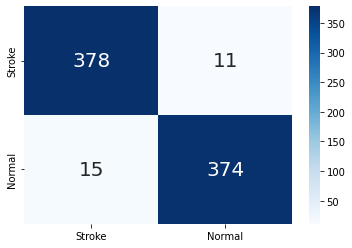

In [12]:

# clf2_chi2_mean = naive_bayes.ComplementNB(alpha = 5.00001).fit(X_new,y_train)
# y_pred2 = clf2_chi2_mean.predict(X_test)
# predicted_prob2 = clf2_chi2_mean.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred2)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("NB")
# print(metrics.classification_report(y_pred2,y_test))
# plt.figure(figsize = (12,8))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()
# #================================================================================
# clf1_chi2_mean = svm.SVC(kernel='rbf',C=1.2,gamma='auto',probability=True).fit(X_new,y_train)
# y_pred = clf1_chi2_mean.predict(X_test)
# predicted_prob1 = clf1_chi2_mean.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("SVM RBF")
# print(metrics.classification_report(y_pred,y_test))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()

# #================================================================================
# clf3_chi2_mean = LogisticRegression(solver='newton-cg',C=100,max_iter=200).fit(X_new,y_train)
# y_pred3 = clf3_chi2_mean.predict(X_test)
# predicted_prob3 = clf3_chi2_mean.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred3)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("Logistic Regression")
# print(metrics.classification_report(y_pred3,y_test))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()
#================================================================================
clf_chi2_mean = GradientBoostingClassifier(n_estimators=300, learning_rate=1, loss = 'exponential', max_depth=10).fit(X_new, y_train)
y_pred = clf_chi2_mean.predict(X_val)
predicted_prob = clf_chi2_mean.predict_proba(X_val)
m_confusion_test = metrics.confusion_matrix(y_val, y_pred)
df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
                             columns = ['Stroke', 'Normal'])
print("GBC")
print(metrics.classification_report(y_pred,y_val))
sns.heatmap(df_cm,
                annot=True,
                cmap='Blues',
                fmt='.5g',
                annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
plt.xlabel('Predicted values', fontsize = 20, **hfont)
plt.ylabel('True values', fontsize = 20, **hfont)
plt.show()
#================================================================================

# forest_chi2_mean = RandomForestClassifier(n_estimators = 300).fit(X_new,y_train)
# y_pred4 = forest_chi2_mean.predict(X_test)
# predicted_prob4 = forest_chi2_mean.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred4)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("Random Forest")
# print(metrics.classification_report(y_pred4,y_test))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()

# for clf, label in zip([clf1_chi2_mean, clf2_chi2_mean,clf3_chi2_mean,clf_chi2_mean,forest_chi2_mean],
#                       ['SVM',
#                        'Naive Bayes',
#                        'Logistic Regression',
#                        'GradientBoosting',
#                        'Random Forest'
#                        ]):

#     scoresTest = cross_val_score(clf, X_test, y_test,
#                                              cv=3, scoring='accuracy')
#     scores2Test = cross_val_score(clf, X_test, y_test,
#                                              cv=3, scoring='f1')
#     print("Accuracy on Test set: %0.3f (+/- %0.3f) [%s]"
#           % (scoresTest.mean(), scoresTest.std(), label))
#     print("F1-Score on Test set: %0.3f (+/- %0.3f) [%s]"
#           % (scores2Test.mean(), scores2Test.std(), label))

#     scoresTrain = cross_val_score(clf, X_new, y_train,
#                                                  cv=3, scoring='accuracy')
#     scores2Train = cross_val_score(clf, X_new, y_train,
#                                                   cv=3, scoring='f1')
#     print("Accuracy on Train set: %0.3f (+/- %0.3f) [%s]"
#           % (scoresTrain.mean(), scoresTrain.std(), label))
#     print("F1-Score on Train set: %0.3f (+/- %0.3f) [%s]"
#           % (scores2Train.mean(), scores2Train.std(), label))

## With Regression

In [ ]:
list_alpha = np.arange(1/100000, 10, 0.1)
param_grid = {'alpha':list_alpha
               }
grid = GridSearchCV(naive_bayes.ComplementNB(), param_grid, refit = True, verbose = 0)
#ComplementNB()

grid.fit(X_new, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
#
# # print classification report
print(metrics.classification_report(y_test, grid_predictions))


param_grid = {'C':[0.001, 0.01, 0.1, 1.0,1.1,1.2,10,100,1000],
              'max_iter': [200,500,1000],
              'solver':['newton-cg','lbfgs']
              }
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 0)


grid.fit(X_new, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

param_grid = {'n_estimators':[10,50,100,200,300,500],
              'learning_rate': [0.001,0.01,0.1,1,10],
              'max_depth':[10,20,50,70,100]
              }
grid = GridSearchCV(GradientBoostingClassifier(loss = 'exponential'), param_grid, refit = True, verbose = 0)


grid.fit(X_new, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

param_grid = {'n_estimators':[10,50,100,200,300,500]
              
              }
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 0)


grid.fit(X_new, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

param_grid = {'C':[0.01,0.1,1,1.2,1.5,10,100,1000,2000],
              'kernel':['rbf','linear'],
              'gamma':['scale','auto']

              }
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 0)


grid.fit(X_new, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

In [ ]:
# clf2_regre_chi2 = naive_bayes.ComplementNB(alpha = 5.00001).fit(X_new,y_train)
# y_pred2 = clf2_regre_chi2.predict(X_test)
# predicted_prob2 = clf2_regre_chi2.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred2)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("NB")
# print(metrics.classification_report(y_pred2,y_test))
# plt.figure(figsize = (12,8))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()
# #================================================================================
# clf1_regre_chi2 = svm.SVC(kernel='rbf',C=1.2,gamma='auto',probability=True).fit(X_new,y_train)
# y_pred = clf1_regre_chi2.predict(X_test)
# predicted_prob1 = clf1_regre_chi2.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("SVM RBF")
# print(metrics.classification_report(y_pred,y_test))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()

# #================================================================================
# clf3_regre_chi2 = LogisticRegression(solver='newton-cg',C=100,max_iter=200).fit(X_new,y_train)
# y_pred3 = clf3_regre_chi2.predict(X_test)
# predicted_prob3 = clf3_regre_chi2.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred3)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("Logistic Regression")
# print(metrics.classification_report(y_pred3,y_test))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()
#================================================================================
clf_regre_chi2 = GradientBoostingClassifier(n_estimators=300, learning_rate=1, loss = 'exponential', max_depth=10).fit(X_new, y_train)
y_pred = clf_regre_chi2.predict(X_val)
predicted_prob = clf_regre_chi2.predict_proba(X_val)
m_confusion_test = metrics.confusion_matrix(y_val, y_pred)
df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
                             columns = ['Stroke', 'Normal'])
print("GBC")
print(metrics.classification_report(y_pred,y_val))
sns.heatmap(df_cm,
                annot=True,
                cmap='Blues',
                fmt='.5g',
                annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
plt.xlabel('Predicted values', fontsize = 20, **hfont)
plt.ylabel('True values', fontsize = 20, **hfont)
plt.show()
#================================================================================

# forest_regre_chi2 = RandomForestClassifier(n_estimators = 300).fit(X_new,y_train)
# y_pred4 = forest_regre_chi2.predict(X_test)
# predicted_prob4 = forest_regre_chi2.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred4)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("Random Forest")
# print(metrics.classification_report(y_pred4,y_test))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()

# for clf, label in zip([clf1_regre_chi2, clf2_regre_chi2,clf3_regre_chi2,clf_regre_chi2,forest_regre_chi2],
#                       ['SVM',
#                        'Naive Bayes',
#                        'Logistic Regression',
#                        'GradientBoosting',
#                        'Random Forest'
#                        ]):

#     scoresTest = cross_val_score(clf, X_test, y_test,
#                                              cv=3, scoring='accuracy')
#     scores2Test = cross_val_score(clf, X_test, y_test,
#                                              cv=3, scoring='f1')
#     print("Accuracy on Test set: %0.3f (+/- %0.3f) [%s]"
#           % (scoresTest.mean(), scoresTest.std(), label))
#     print("F1-Score on Test set: %0.3f (+/- %0.3f) [%s]"
#           % (scores2Test.mean(), scores2Test.std(), label))

#     scoresTrain = cross_val_score(clf, X_new, y_train,
#                                                  cv=3, scoring='accuracy')
#     scores2Train = cross_val_score(clf, X_new, y_train,
#                                                   cv=3, scoring='f1')
#     print("Accuracy on Train set: %0.3f (+/- %0.3f) [%s]"
#           % (scoresTrain.mean(), scoresTrain.std(), label))
#     print("F1-Score on Train set: %0.3f (+/- %0.3f) [%s]"
#           % (scores2Train.mean(), scores2Train.std(), label))

## Training approach without chi2 test for feature selection

## With mean value of BMI

In [ ]:
list_alpha = np.arange(1/100000, 10, 0.1)
param_grid = {'alpha':list_alpha
               }
grid = GridSearchCV(naive_bayes.ComplementNB(), param_grid, refit = True, verbose = 0)
#ComplementNB()

grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
#
# # print classification report
print(metrics.classification_report(y_test, grid_predictions))



param_grid = {'C':[0.001, 0.01, 0.1, 1.0,1.1,1.2,10,100,1000],
              'max_iter': [200,500,1000],
              'solver':['newton-cg','lbfgs']
              }
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 0)


grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

param_grid = {'n_estimators':[10,50,100,200,300,500],
              'learning_rate': [0.001,0.01,0.1,1,10],
              'max_depth':[10,20,50,70,100]
              }
grid = GridSearchCV(GradientBoostingClassifier(loss = 'exponential'), param_grid, refit = True, verbose = 0)


grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

param_grid = {'n_estimators':[10,50,100,200,300,500]
              
              }
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 0)


grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

param_grid = {'C':[0.01,0.1,1,1.2,1.5,10,100,1000,2000,3000],
              'kernel':['rbf'],
              'gamma':['scale','auto']

              }
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 2)


grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_) #{'C': 2000, 'gamma': 'scale', 'kernel': 'rbf'}
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

In [ ]:
# clf2_mean = naive_bayes.ComplementNB(alpha=1e-05).fit(X_train,y_train)
# y_pred2 = clf2_mean.predict(X_test)
# predicted_prob2 = clf2_mean.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred2)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("NB")
# print(metrics.classification_report(y_pred2,y_test))
# plt.figure(figsize = (12,8))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()
# #================================================================================
# for BMI mean and without chi2{'C': 3000, 'gamma': 'scale', 'kernel': 'rbf'}
# clf1_mean = svm.SVC(kernel='linear',C=0.1,gamma='auto',probability=True).fit(X_train,y_train)
# y_pred = clf1_mean.predict(X_test)
# predicted_prob1 = clf1_mean.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("SVM RBF")
# print(metrics.classification_report(y_pred,y_test))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()

#================================================================================
# for BMI mean and without chi2 {'C': 1.0, 'max_iter': 200, 'solver': 'newton-cg'}
# clf3_mean = LogisticRegression(solver='lbfgs',C=0.1,max_iter=500).fit(X_train,y_train)
# y_pred3 = clf3_mean.predict(X_test)
# predicted_prob3 = clf3_mean.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred3)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("Logistic Regression")
# print(metrics.classification_report(y_pred3,y_test))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()
#================================================================================
#for BMI mean and without chi2 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}
clf_mean = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, loss = 'exponential', max_depth=70).fit(X_train, y_train)
y_pred = clf_mean.predict(X_val)
predicted_prob = clf_mean.predict_proba(X_val)
m_confusion_test = metrics.confusion_matrix(y_val, y_pred)
df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
                             columns = ['Stroke', 'Normal'])
print("GBC")
print(metrics.classification_report(y_pred,y_val))
sns.heatmap(df_cm,
                annot=True,
                cmap='Blues',
                fmt='.5g',
                annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
plt.xlabel('Predicted values', fontsize = 20, **hfont)
plt.ylabel('True values', fontsize = 20, **hfont)
plt.show()

#==============================================================================
#for BMI mean and without chi2 {'n_estimators': 200}
# forest_mean = RandomForestClassifier(n_estimators = 300).fit(X_train,y_train)
# y_pred4 = forest_mean.predict(X_test)
# predicted_prob4 = forest_mean.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred4)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("Random Forest")
# print(metrics.classification_report(y_pred4,y_test))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()


# for clf, label in zip([clf1_mean, clf2_mean,clf3_mean,clf_mean,forest_mean],
#                       ['SVM',
#                        'Naive Bayes',
#                        'Logistic Regression',
#                        'GradientBoosting',
#                        'Random Forest'
#                        ]):

#     scoresTest = cross_val_score(clf, X_test, y_test,
#                                              cv=3, scoring='accuracy')
#     scores2Test = cross_val_score(clf, X_test, y_test,
#                                              cv=3, scoring='f1')
#     print("Accuracy on Test set: %0.3f (+/- %0.3f) [%s]"
#           % (scoresTest.mean(), scoresTest.std(), label))
#     print("F1-Score on Test set: %0.3f (+/- %0.3f) [%s]"
#           % (scores2Test.mean(), scores2Test.std(), label))

#     scoresTrain = cross_val_score(clf, X_train, y_train,
#                                                  cv=3, scoring='accuracy')
#     scores2Train = cross_val_score(clf, X_train, y_train,
#                                                   cv=3, scoring='f1')
#     print("Accuracy on Train set: %0.3f (+/- %0.3f) [%s]"
#           % (scoresTrain.mean(), scoresTrain.std(), label))
#     print("F1-Score on Train set: %0.3f (+/- %0.3f) [%s]"
#           % (scores2Train.mean(), scores2Train.std(), label))

## With regression

In [ ]:
list_alpha = np.arange(1/100000, 10, 0.1)
param_grid = {'alpha':list_alpha
               }
grid = GridSearchCV(naive_bayes.ComplementNB(), param_grid, refit = True, verbose = 0)
#ComplementNB()

grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
#
# # print classification report
print(metrics.classification_report(y_test, grid_predictions))



param_grid = {'C':[0.001, 0.01, 0.1, 1.0,1.1,1.2,10,100,1000],
              'max_iter': [200,500,1000],
              'solver':['newton-cg','lbfgs']
              }
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 0)


grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

param_grid = {'n_estimators':[10,50,100,200,300,500],
              'learning_rate': [0.001,0.01,0.1,1,10],
              'max_depth':[10,20,50,70,100]
              }
grid = GridSearchCV(GradientBoostingClassifier(loss = 'exponential'), param_grid, refit = True, verbose = 0)


grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

param_grid = {'n_estimators':[10,50,100,200,300,500]
              
              }
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 0)


grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

param_grid = {'C':[0.01,0.1,1,1.2,1.5,10,100,1000,2000,3000],
              'kernel':['rbf'],
              'gamma':['scale','auto']

              }
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 2)


grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_) #{'C': 2000, 'gamma': 'scale', 'kernel': 'rbf'}
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(y_test, grid_predictions))

In [ ]:
# clf2_regre = naive_bayes.ComplementNB(alpha=1e-05).fit(X_train,y_train)
# y_pred2 = clf2_regre.predict(X_test)
# predicted_prob2 = clf2_regre.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred2)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("NB")
# print(metrics.classification_report(y_pred2,y_test))
# plt.figure(figsize = (12,8))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()
# #================================================================================
# for BMI mean and without chi2{'C': 3000, 'gamma': 'scale', 'kernel': 'rbf'}
# clf1_regre = svm.SVC(kernel='linear',C=0.1,gamma='auto',probability=True).fit(X_train,y_train)
# y_pred = clf1_regre.predict(X_test)
# predicted_prob1 = clf1_regre.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("SVM RBF")
# print(metrics.classification_report(y_pred,y_test))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()

#================================================================================
# for BMI mean and without chi2 {'C': 1.0, 'max_iter': 200, 'solver': 'newton-cg'}
# clf3_regre = LogisticRegression(solver='lbfgs',C=0.1,max_iter=500).fit(X_train,y_train)
# y_pred3 = clf3_regre.predict(X_test)
# predicted_prob3 = clf3_regre.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred3)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("Logistic Regression")
# print(metrics.classification_report(y_pred3,y_test))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()
#================================================================================
#for BMI mean and without chi2 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}
clf_regre = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, loss = 'exponential', max_depth=70).fit(X_train, y_train)
y_pred = clf_regre.predict(X_val)
predicted_prob = clf_regre.predict_proba(X_val)
m_confusion_test = metrics.confusion_matrix(y_val, y_pred)
df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
                             columns = ['Stroke', 'Normal'])
print("GBC")
print(metrics.classification_report(y_pred,y_val))
sns.heatmap(df_cm,
                annot=True,
                cmap='Blues',
                fmt='.5g',
                annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
plt.xlabel('Predicted values', fontsize = 20, **hfont)
plt.ylabel('True values', fontsize = 20, **hfont)
plt.show()

#==============================================================================
#for BMI mean and without chi2 {'n_estimators': 200}
# forest_regre = RandomForestClassifier(n_estimators = 300).fit(X_train,y_train)
# y_pred4 = forest_regre.predict(X_test)
# predicted_prob4 = forest_regre.predict_proba(X_test)
# m_confusion_test = metrics.confusion_matrix(y_test, y_pred4)
# df_cm = pd.DataFrame(m_confusion_test, index = ['Stroke', 'Normal'],
#                              columns = ['Stroke', 'Normal'])
# print("Random Forest")
# print(metrics.classification_report(y_pred4,y_test))
# sns.heatmap(df_cm,
#                 annot=True,
#                 cmap='Blues',
#                 fmt='.5g',
#                 annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
# plt.xlabel('Predicted values', fontsize = 20, **hfont)
# plt.ylabel('True values', fontsize = 20, **hfont)
# plt.show()


# for clf, label in zip([clf1_regre, clf2_regre,clf3_regre,clf_regre,forest_regre],
#                       ['SVM',
#                        'Naive Bayes',
#                        'Logistic Regression',
#                        'GradientBoosting',
#                        'Random Forest'
#                        ]):

#     scoresTest = cross_val_score(clf, X_test, y_test,
#                                              cv=3, scoring='accuracy')
#     scores2Test = cross_val_score(clf, X_test, y_test,
#                                              cv=3, scoring='f1')
#     print("Accuracy on Test set: %0.3f (+/- %0.3f) [%s]"
#           % (scoresTest.mean(), scoresTest.std(), label))
#     print("F1-Score on Test set: %0.3f (+/- %0.3f) [%s]"
#           % (scores2Test.mean(), scores2Test.std(), label))

#     scoresTrain = cross_val_score(clf, X_train, y_train,
#                                                  cv=3, scoring='accuracy')
#     scores2Train = cross_val_score(clf, X_train, y_train,
#                                                   cv=3, scoring='f1')
#     print("Accuracy on Train set: %0.3f (+/- %0.3f) [%s]"
#           % (scoresTrain.mean(), scoresTrain.std(), label))
#     print("F1-Score on Train set: %0.3f (+/- %0.3f) [%s]"
#           % (scores2Train.mean(), scores2Train.std(), label))

In [13]:
# import joblib
# filenameLR = 'GB.sav'
# joblib.dump(clf, filenameLR)

['GB.sav']

In [14]:
X_test=StatisticalTest.fit_transform(X_test, y_test)



Accuracy on Test set: 0.896 (+/- 0.003) [GradientBoosting]
F1-Score on Test set: 0.900 (+/- 0.005) [GradientBoosting]


(1945,)
Accuracy: 0.97
macro F1: 0.97
Recall: 0.96
Precission: 0.97
Detail:
Optimal Threshold value is: 0.9729872655694237


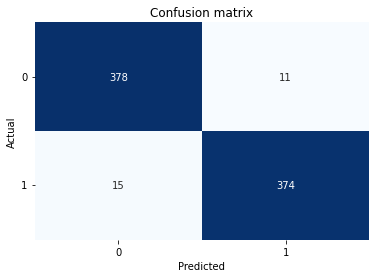

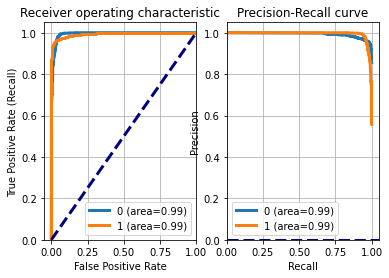

In [16]:
from sklearn.metrics import roc_curve
# # calculate roc curves
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# # get the best threshold
# J = tpr - fpr
# ix = argmax(J)
# best_thresh = thresholds[ix]
# print('Best Threshold=%f' % (best_thresh))
def getMetrics(clf,name):
    print("For ",name)
    predicted_prob2 = clf.predict_proba(X_test)
    y_pred2 = clf.predict(X_test)
    classes = np.unique(y_test)
    y_test_array = pd.get_dummies(y_test, drop_first=False).values
    print(y_test.shape)
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test, y_pred2)
    fscore = metrics.f1_score(y_test, y_pred2)

    prec=metrics.precision_score(y_test, y_pred2)
    rec = metrics.recall_score(y_test, y_pred2)
    print("Accuracy:",  round(accuracy,2))
    print("macro F1:",  round(fscore,2))
    print("Recall:", round(rec,2))
    print("Precission:", round(prec,2))
    print("Detail:")



    fig, ax = plt.subplots()
    sns.heatmap(m_confusion_test, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
                cbar=False)
    ax.set(xlabel="Predicted", ylabel="Actual", xticklabels=classes,
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],
                                                 predicted_prob2[:,i])
        ax[0].plot(fpr, tpr, lw=3,
                   label='{0} (area={1:0.2f})'.format(classes[i],
                                                      metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05],
              xlabel='False Positive Rate',
              ylabel="True Positive Rate (Recall)",
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    optimal_idxGB = np.argmax(tpr - fpr)
    optimal_thresholdGB = thresholds[optimal_idxGB]
    print("Optimal Threshold value is:", optimal_thresholdGB)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
            y_test_array[:,i], predicted_prob2[:,i])
        ax[1].plot(recall, precision, lw=3,
                   label='{0} (area={1:0.2f})'.format(classes[i],
                                                      metrics.auc(recall, precision))
                   )

    ax[1].plot(thresholds, color='navy', lw=3, linestyle='--')    
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall',
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.show()

# Fill nan values with mean of BMI

## Metrics For with chi2 

In [ ]:
getMetrics(clf)

## Metrics For without chi2 

In [ ]:
getMetrics(clf)

# Fill nan values with Regression

## Metrics For with chi2 

In [ ]:
getMetrics(clf)

## Metrics For without chi2 

In [ ]:
getMetrics(clf)

In [ ]:
# from sklearn.manifold import TSNE
# import plotly.express as px
# from plotly.offline import iplot
# tsne = TSNE(n_components=2,learning_rate='auto',init='random')
# # pca= PCA(n_components=1)
# X_embedded  = tsne.fit_transform(X_test)
# df = pd.DataFrame(columns=['tsne_1','tsne_2','probas','tweet','Sentiment'])
# df['tsne_1'] = X_embedded[:, 0]
# # df['pca'] = X_embedded[:, 0]
# df['tsne_2'] = X_embedded[:, 1]
# df['probas'] = pd.DataFrame(predicted_prob[:,1])
# df['gender'] = data['gender']
# df['stroke'] = data['stroke']
#     # print(df.shape)
#     # print(df['tsne_1'].head(2))
# fig = px.scatter(df, x='probas', y='tsne_1', hover_name= 'gender',color='stroke',size_max=45
#                      , template='plotly_white', title='unigram-Bigram similarity and frequency per Sentiment from LR', labels={'words': 'Avg. Length<BR>(words)'}
#                      , color_continuous_scale=px.colors.sequential.Sunsetdark)
# fig.update_traces(marker=dict(line=dict(width=1, color='Gray')))
# fig.update_xaxes(visible=False)
# fig.update_yaxes(visible=False)
# # fig.show()

# iplot(fig)